In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import linregress

%matplotlib inline

Use Pandas to import the data from epa-sea-level.csv.

Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

## importing data

In [8]:
df=pd.read_csv('epa-sea-level.csv',parse_dates=True)
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## creating scatterplot using matplotlib 
- Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.


## calculating best fit 
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.


In [12]:
linregress(df['Year'],df['CSIRO Adjusted Sea Level'])

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.0009692118713287149, intercept_stderr=1.8869433812425223)

Text(0.5, 1.0, 'Rise in Sea Level')

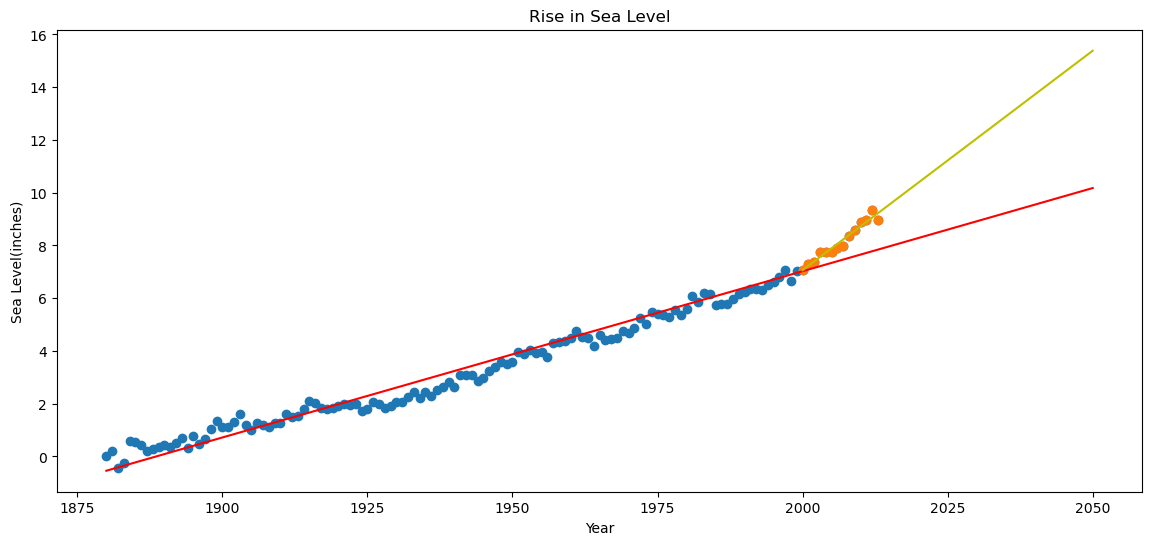

In [27]:
plt.figure(figsize = (14,6))
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

plt.scatter(x,y) #scatter plot 

#first best fit
reg = linregress(x,y) #regression/slope/y-int
x_predict = pd.Series([i for i in range(1880,2051)])#calculate the values for best fit
y_predict = reg.slope*x_predict + reg.intercept #y = mx+b
plt.plot(x_predict,y_predict,"r")

#second best fit
new_df = df[df.Year >=2000]
x1 = new_df['Year']
y1 = new_df['CSIRO Adjusted Sea Level']
plt.scatter(x1,y1) #scatter plot 

reg1 = linregress(x1,y1) #regression/slope/y-int
x_predict1 = pd.Series([i for i in range(2000,2051)])#calculate the values for best fit
y_predict1 = reg1.slope*x_predict1 + reg1.intercept #y = mx+b
plt.plot(x_predict1,y_predict1,"y")

#title and labels
plt.xlabel('Year')
plt.ylabel('Sea Level(inches)')
plt.title('Rise in Sea Level')